# LINEAR DISCRIMANT ANALYSIS (LDA): SPEECH CLASSIFICATION
Linear Discriminant Analysis or LDA is a dimensionality reduction technique used to reduce the number of dimensions (i.e. variables) in a dataset while retaining as much information as possible. Using LDA based classification, we can find discriminative features for a given audio segment to achieve the task of Automatic Speech Classification such that speech belonging to the same class are close together, but samples from different classes are far apart from each other.

__Question:__

In order to implement LDA, first generate a dummy dataset (say IRIS dataset having 4 features) and the use LDA to decrease the number of features to one/two. Now using this modified dataset, try to learn a classifier to test the performance of LDA for dimensionality reduction.

# Sanatkumar Ippalpalli Eckovation 15 Aug 20 Batch -4

In [1]:
# Import sklearn daatasets, model selection, neural network, numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import cv2
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import os
import cv2
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#Loading the Data
iris = load_iris()

# CONVERT DATASET INTO PANDAS DATAFRAME



In [3]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target'].astype('int32')],
                     columns= iris['feature_names'] + ['target'])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
#
convert_dict = {'target': int}
  
df = df.astype(convert_dict)
print(df.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object


In [6]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# VISUALIZATION OF DATASET


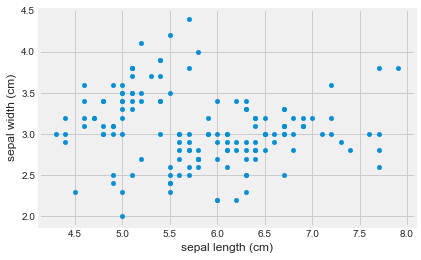

In [8]:
df.plot(kind='scatter',x = 'sepal length (cm)',y = 'sepal width (cm)')

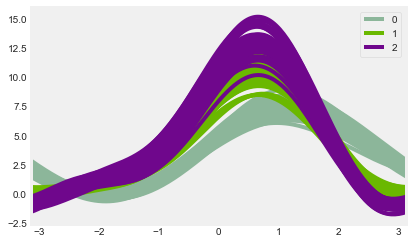

In [9]:
from pandas.plotting import andrews_curves
andrews_curves(df, "target")
plt.show()

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [13]:
#
LDA = LinearDiscriminantAnalysis()

In [14]:
LDA.fit_transform(X_train,y_train)

array([[-4.84067405e+00, -7.13324053e-02],
       [-2.88211420e+00, -4.17209189e-01],
       [ 8.03567978e+00,  3.26956961e-01],
       [-3.89470618e+00,  3.43586495e-01],
       [-6.54983828e+00,  4.36394017e-01],
       [-1.82070045e+00, -6.25866457e-01],
       [ 8.21194998e+00,  1.20115073e+00],
       [-4.30852939e+00, -1.12714254e+00],
       [-1.66771952e+00,  2.26835893e-01],
       [-1.01440565e+00, -1.22446189e+00],
       [-5.37006829e+00,  8.50646310e-01],
       [ 7.58761392e+00, -2.47420268e-01],
       [-4.75387262e+00,  2.19866333e+00],
       [ 6.50901627e+00,  1.29397869e+00],
       [ 8.50417325e+00,  8.08781352e-01],
       [-9.27465186e-01, -2.74060499e+00],
       [-4.86682499e+00, -2.06868090e-01],
       [-6.63347246e+00,  2.30816018e+00],
       [-4.45634285e+00, -2.24121085e+00],
       [-6.00387858e+00, -1.42321508e+00],
       [-8.49519549e-01, -1.69101095e+00],
       [-6.36553895e+00,  1.16326609e+00],
       [-2.28965242e+00,  6.67737607e-01],
       [-8.

In [15]:
pred = LDA.predict(X_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
print(accuracy_score(y_test,pred))

1.0


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [20]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [21]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
pred1 = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
pred1

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [23]:
#
print(accuracy_score(y_test,pred1))

1.0
